# Bridging Simplicity and Sophistication using GLinear: A Novel Architecture for Enhanced Time Series Prediction (https://arxiv.org/pdf/2501.01087)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, ReLU, Input
import matplotlib.pyplot as plt


In [3]:
# Generate synthetic sequence data
def generate_data(seq_len=30, horizon=5, num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        freq = np.random.rand() * 0.5 + 0.1
        series = np.sin(np.linspace(start, start + freq * (seq_len + horizon), seq_len + horizon))
        X.append(series[:seq_len])
        y.append(series[seq_len:])
    return np.array(X), np.array(y)

In [4]:
# Prepare data
seq_len, horizon = 30, 5
X, y = generate_data(seq_len, horizon)
X_train, X_val = X[:800], X[800:]
y_train, y_val = y[:800], y[800:]

In [5]:
# Define GLinear-inspired model in TensorFlow
model = Sequential([
    Input(shape=(seq_len,)),
    Dense(seq_len),
    ReLU(),
    Dense(horizon)
])

In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [7]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.9977 - mae: 0.8140 - val_loss: 0.6548 - val_mae: 0.6803
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6220 - mae: 0.6687 - val_loss: 0.4704 - val_mae: 0.5976
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4554 - mae: 0.5810 - val_loss: 0.3912 - val_mae: 0.5497
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3860 - mae: 0.5355 - val_loss: 0.3483 - val_mae: 0.5184
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3380 - mae: 0.5016 - val_loss: 0.3186 - val_mae: 0.4920


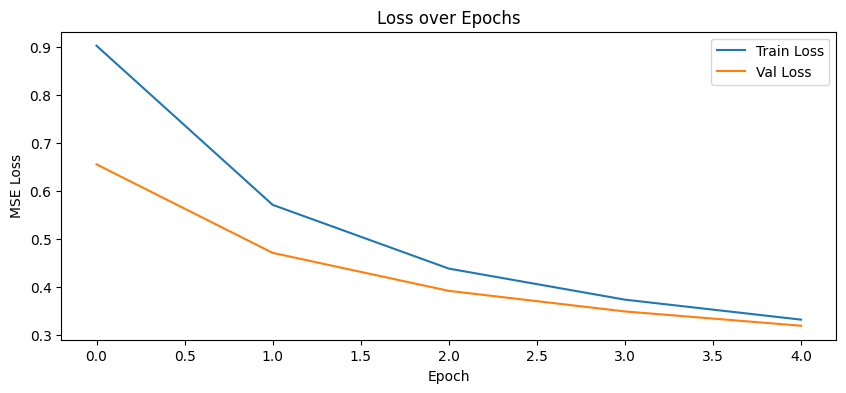

In [8]:
# Plot loss curves
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


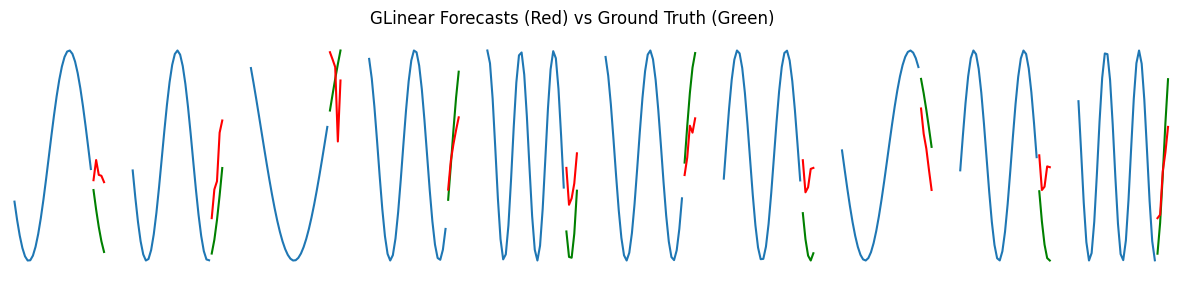

In [9]:
# Visualize predictions
preds = model.predict(X_val[:10])
plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.plot(range(seq_len), X_val[i], label='Input')
    plt.plot(range(seq_len, seq_len + horizon), y_val[i], label='True', color='green')
    plt.plot(range(seq_len, seq_len + horizon), preds[i], label='Pred', color='red')
    plt.axis('off')
plt.suptitle('GLinear Forecasts (Red) vs Ground Truth (Green)')
plt.show()
